# Competition - Reporting on Sales Data

## 0. Load Library

In [14]:
library(tidyverse)
library(skimr)

## Load Dataset

In [15]:
url = "https://raw.githubusercontent.com/lulusAk/Datacamp-Reporting-on-Sales-Data/main/sales_data.csv"
df <- read.csv(url)
head(df)

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>
1,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
2,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
3,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
4,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
5,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card
6,2021-06-01,North,Wholesale,Suspension & traction,40,37.37,1494.80,Transfer


In [16]:
skim(df)

-- Data Summary ------------------------
                           Values
Name                       df    
Number of rows             1000  
Number of columns          8     
_______________________          
Column type frequency:           
  character                5     
  numeric                  3     
________________________         
Group variables            None  

-- Variable type: character ----------------------------------------------------
# A tibble: 5 x 8
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
* <chr>             <int>         <dbl> <int> <int> <int>    <int>      <int>
1 date                  0             1    10    10     0       89          0
2 warehouse             0             1     4     7     0        3          0
3 client_type           0             1     6     9     0        2          0
4 product_line          0             1     6    21     0        6          0
5 payment               0             1     4    11

In [17]:
head(df)

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>
1,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
2,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
3,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
4,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
5,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card
6,2021-06-01,North,Wholesale,Suspension & traction,40,37.37,1494.80,Transfer


## 1. What are the total sales for each payment method?

In [18]:
by_payment<- group_by(df,payment)

In [19]:
totalsales <- summarize(by_payment, sum_total= sum(total, na.rm=TRUE))
totalsales

payment,sum_total
<chr>,<dbl>
Cash,19199.1
Credit card,110271.6
Transfer,159642.3


Note 1:
Total Sales for each payment method are ;
Cash        : 19199.1
Credit Card : 110271.6
Transfer    : 159642.3

## 2. What is the average unit price for each product line?

In [20]:
by_prodline<- group_by(df,product_line)

In [21]:
avg_prodline <- summarize(by_prodline, mean_unit_price = mean(unit_price))
avg_prodline

product_line,mean_unit_price
<chr>,<dbl>
Breaking system,17.74052
Electrical system,25.58513
Engine,60.09180
Frame & body,42.83223
Miscellaneous,22.81074
Suspension & traction,33.96987


Note 2:
The Average unit price for each product line are;
Breaking system	      17.74052		
Electrical system	    25.58513		
Engine	              60.09180		
Frame & body	        42.83223		
Miscellaneous	        22.81074		
Suspension & traction	33.96987	

## 3. Create plots to visualize findings for questions 1 and 2.

### Total Sales by Payment Methode

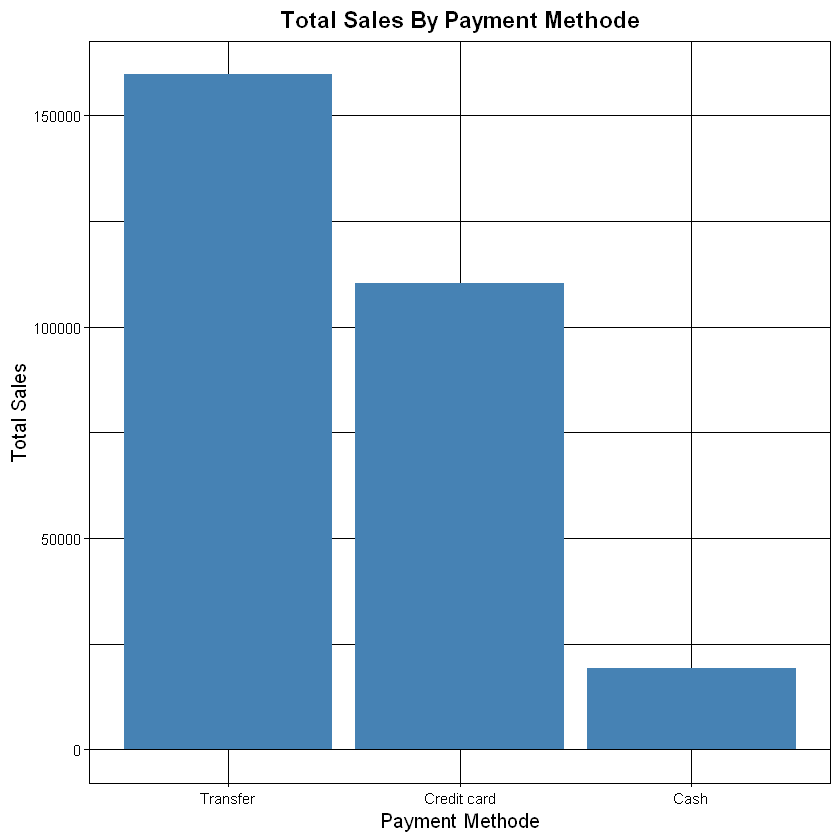

In [22]:
ggplot(totalsales) +
  aes(x = reorder(payment,-sum_total), weight = sum_total) +
  geom_bar(fill = "#4682B4") +
  labs(
    x = "Payment Methode",
    y = "Total Sales",
    subtitle = "Total Sales By Payment Methode"
  ) +
  theme_linedraw() +
  theme(
    plot.subtitle = element_text(size = 14L,
    face = "bold",
    hjust = 0.5),
    axis.title.y = element_text(size = 12L),
    axis.title.x = element_text(size = 12L)
  )

Note ;
We found that sales transactions done frequently by transfer methode. 

### Product Line Average Unit Price

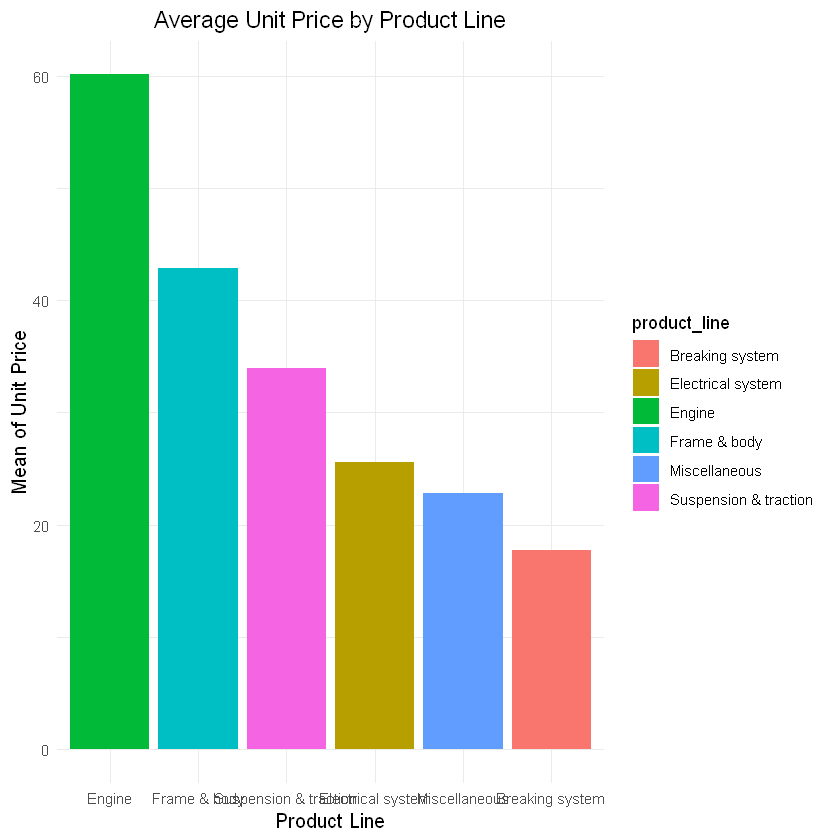

In [23]:
ggplot(avg_prodline) +
  aes(x = reorder(product_line,-mean_unit_price), weight = mean_unit_price, fill = product_line) +
  geom_bar() +
  labs(
    x = "Product Line",
    y = "Mean of Unit Price",
    subtitle = "Average Unit Price by Product Line"
  ) +
  theme_minimal() +
  theme(
    plot.subtitle = element_text(size = 14L,
    hjust = 0.5),
    axis.title.y = element_text(size = 12L),
    axis.title.x = element_text(size = 12L)
  )

Note 3:
We found that Engine Category has the highest Average Unit Price

## 4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)

In [24]:
by_client_type <- group_by(df,client_type)

In [25]:
client <- summarize(by_client_type, mean_sales = mean(total))
client

client_type,mean_sales
<chr>,<dbl>
Retail,167.0589
Wholesale,709.5215


Note:
We found that Wholesale has high average purchase by Client Type

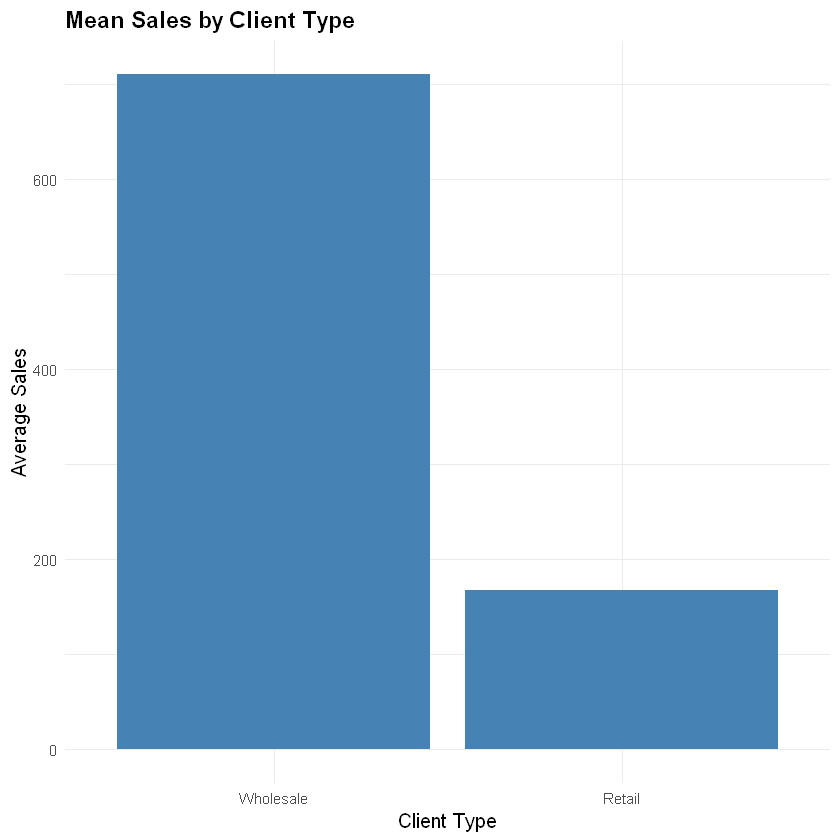

In [26]:
ggplot(client) +
  aes(x = reorder(client_type,-mean_sales), weight = mean_sales) +
  geom_bar(fill = "#4682B4") +
  labs(
    x = "Client Type",
    y = "Average Sales",
    subtitle = "Mean Sales by Client Type"
  ) +
  theme_minimal() +
  theme(
    plot.subtitle = element_text(size = 14L,
    face = "bold"),
    axis.title.y = element_text(size = 12L),
    axis.title.x = element_text(size = 12L)
  )

### Total Sales by Product Line

In [27]:
productline<- group_by(df, product_line)

In [28]:
prod_total<- summarize(productline, sumtotal = sum(total))
prod_total

product_line,sumtotal
<chr>,<dbl>
Breaking system,38350.15
Electrical system,43612.71
Engine,37945.38
Frame & body,69024.73
Miscellaneous,27165.82
Suspension & traction,73014.21


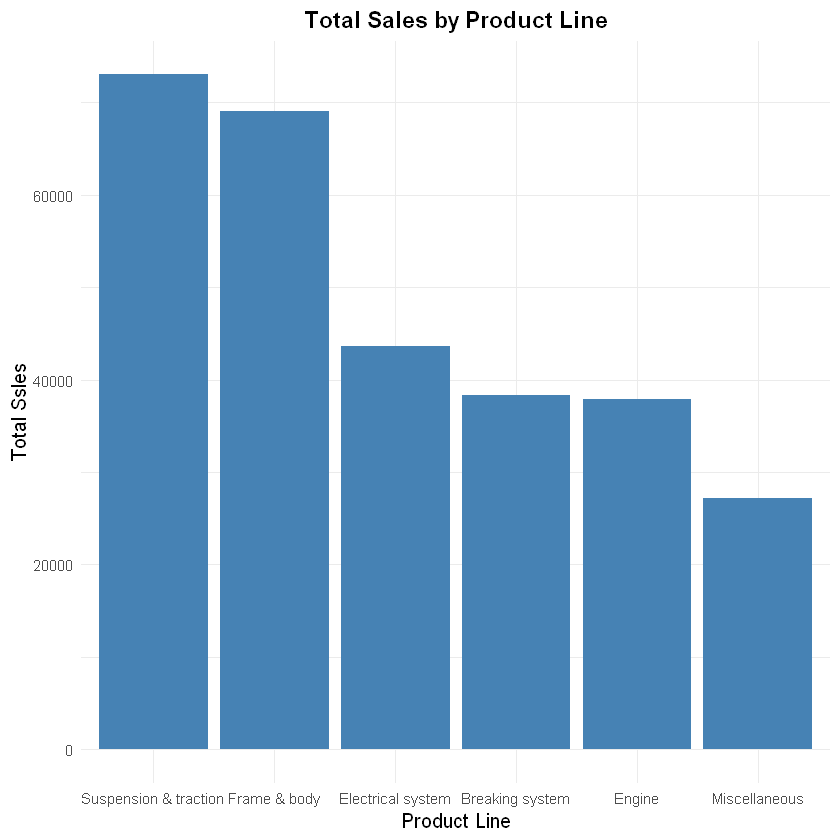

In [29]:
ggplot(prod_total) +
  aes(x=reorder(product_line,-sumtotal), weight = sumtotal) +
  geom_bar(fill = "#4682B4") +
  labs(
    x = "Product Line",
    y = "Total Ssles",
    subtitle = "Total Sales by Product Line"
  ) +
  theme_minimal() +
  theme(
    plot.subtitle = element_text(size = 14L,
    face = "bold",
    hjust = 0.5),
    axis.title.y = element_text(size = 12L),
    axis.title.x = element_text(size = 12L)
  )

Note 5:
We found that Suspension & Traction category has the highest total sales on Product Line

## 5. Summarize your findings.

We found some facts through our analysis process, here are the summary of our findings:
1)  Total Sales for each payment method are ;
Cash        : 19199.1
Credit Card : 110271.6
Transfer    : 159642.3

2)    The Average unit price for each product line are;
Breaking system	      17.74052		
Electrical system	    25.58513		
Engine	              60.09180		
Frame & body	        42.83223		
Miscellaneous	        22.81074		
Suspension & traction	33.96987	

3) We found that Engine Category has the highest Average Unit Price

4) We found that Wholesale has high average purchase by Client Type

5) We found that Suspension & Traction category has the highest total sales on Product Line